In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neural_network import *
from sklearn.metrics import *
import xgboost as xgb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)
import seaborn as sns
from ipynb.fs.full.Performance_Utilities import calculate_optimal_threshold, print_metrics
from utils.create_features_utils import *
from sklearn.base import clone
import os

In [2]:
df = pd.read_csv('data/wimbledon_matches_with_feature.csv')
raw_tennis_file = "data/mens/combined_raw_data.csv"
round_16_file = "data/wimbledon_2019.csv"
r16_augie = pd.read_excel("data/r16_augie.xlsx")

In [3]:
raw_tennis = pd.read_csv(raw_tennis_file) # Raw tennis file
round_16 = pd.read_csv(round_16_file) # All match results from all years

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (27,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
features_list = [
 'diff_rank',
 'diff_match_win_percent',
 'diff_games_win_percent',
 'diff_5_set_match_win_percent',
 'diff_close_sets_percent',
 'diff_match_win_percent_grass',
 'diff_games_win_percent_grass',
 'diff_5_set_match_win_percent_grass',
 'diff_close_sets_percent_grass',
 'diff_match_win_percent_52',
 'diff_games_win_percent_52',
 'diff_5_set_match_win_percent_52',
 'diff_close_sets_percent_52',
 'diff_match_win_percent_grass_60',
 'diff_games_win_percent_grass_60',
 'diff_5_set_match_win_percent_grass_60',
 'diff_close_sets_percent_grass_60',
 'diff_match_win_percent_hh',
 'diff_games_win_percent_hh',
 'diff_match_win_percent_grass_hh',
 'diff_games_win_percent_grass_hh']

In [5]:
df = df.dropna()

df['diff_rank'] = df['player_0_rank'] - df['player_1_rank']

In [6]:
# Train-test split
y = df.outcome
X = df[features_list]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, shuffle=True, test_size=0.20)

In [7]:
# Final to predict on
r16_augie['Date'] = '2019/07/07'
r16_augie['Surface'] = 'Grass'
r16_augie['diff_rank'] = r16_augie['player_0_rank'] - r16_augie['player_1_rank']

wimby_2019 = create_features(r16_augie, raw_tennis) # Round 16 and on Wimby 2019
X_wimby_2019 = wimby_2019[features_list]

Creating Player Career Stats All Surface
Creating Player Career Stats on Grass/Clay/Hard
Creating Player Career Stats All Surface Last 52 Weeks
Creating Player Career Stats on Grass/Clay/Hard Last 60 Weeks
Creating Player Head to Head Career Stats All Surface
Creating Player Head to Head Career Stats On Grass
Creating Difference Variables


In [8]:
alpha = [.00001, .0001, .001]
hidden_layer_sizes = [5, 7, 10, 15, 20]
params = [(x, y) for x in alpha for y in hidden_layer_sizes]
print(params)
auc_ls = []
f1_ls = []

for i in params:
    nn = MLPClassifier(alpha = i[0], activation='relu', hidden_layer_sizes = i[1], random_state=456)
    nn.fit(X_train, y_train)
    auc = print_metrics(X_test, y_test, nn, "NN")[2]
    f1 = print_metrics(X_test, y_test, nn, "NN")[3]
    auc_ls.append(auc)
    f1_ls.append(f1) 

[(1e-05, 5), (1e-05, 7), (1e-05, 10), (1e-05, 15), (1e-05, 20), (0.0001, 5), (0.0001, 7), (0.0001, 10), (0.0001, 15), (0.0001, 20), (0.001, 5), (0.001, 7), (0.001, 10), (0.001, 15), (0.001, 20)]


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http

Error in callback <function flush_figures at 0x1a23217440> (for post_execute):


KeyboardInterrupt: 

[2.2 1.8 1.9 1.  1.3 2.4 1.6 1.9 1.4 1.3 2.4 2.5 1.9 1.1 1.2]
[1.92 0.29 0.77 0.91 1.06 1.73 0.33 0.77 1.43 1.1  1.92 0.1  0.77 0.91
 1.06]


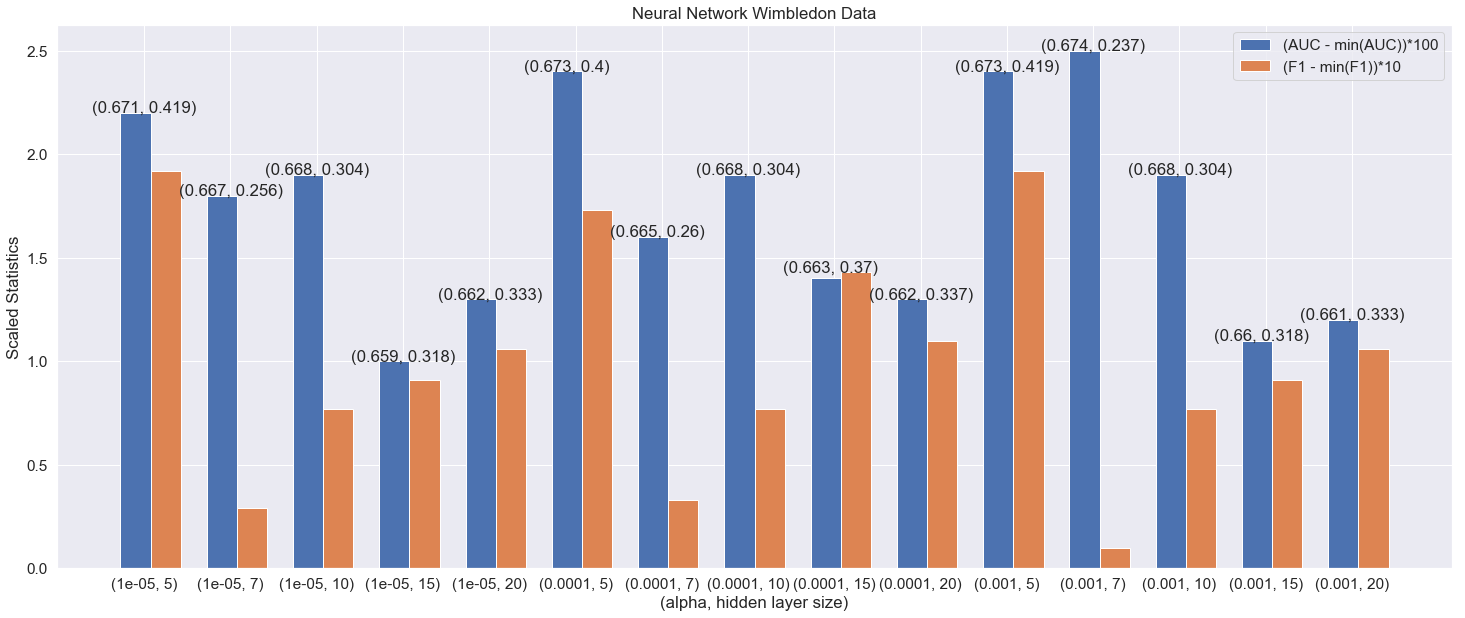

In [14]:
# Scale for plot
scale_auc_ls = (auc_ls - (min(auc_ls)-.01))*100
print(scale_auc_ls)
scale_f1_ls = (f1_ls - (min(f1_ls)-.01))*10
print(scale_f1_ls)

# Plot
n_combos = len(params)
index = np.arange(n_combos)
axes = plt.gca()
bar_width = .35


aucs = plt.bar(index, scale_auc_ls, bar_width, label = "(AUC - min(AUC))*100")
f1s = plt.bar(index+bar_width, scale_f1_ls, bar_width, label = "(F1 - min(F1))*10")

plt.xticks(index+.1, params)
for i, v in enumerate(scale_auc_ls):
    plt.text(i - .5, max(scale_auc_ls[i], scale_f1_ls[i]), str((auc_ls[i], f1_ls[i])))

plt.xlabel("(alpha, hidden layer size)")
plt.ylabel("Scaled Statistics")
plt.title("Neural Network Wimbledon Data")
plt.legend()

In [15]:
nn = MLPClassifier(activation='relu', alpha = .001, hidden_layer_sizes = 5, random_state = 456)
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=5, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=456, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


,Model,Accuracy,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Sensitivity,Specificity,AUC,F1-Score,Geometric Mean,Kappa-Statistics,Sklearn Version
0,NN,0.773,0.295,0.956,0.044,0.705,0.295,0.956,0.673,0.419,0.531,0.307,0.22


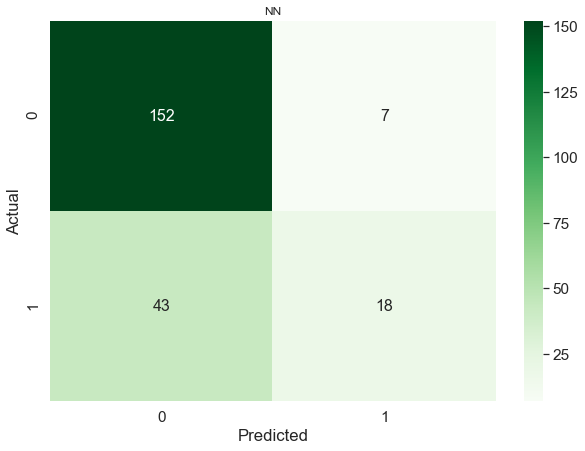

In [16]:
print_metrics(X_test, y_test, nn, "NN")[1]

In [17]:
nn.predict_proba(X_wimby_2019)

array([[0.94792369, 0.05207631],
       [0.56843384, 0.43156616],
       [0.79801925, 0.20198075],
       [0.8633122 , 0.1366878 ],
       [0.85862297, 0.14137703],
       [0.93466667, 0.06533333],
       [0.8681773 , 0.1318227 ],
       [0.85124333, 0.14875667],
       [0.82879075, 0.17120925],
       [0.59186834, 0.40813166],
       [0.86178173, 0.13821827],
       [0.7733221 , 0.2266779 ],
       [0.77017166, 0.22982834],
       [0.54277553, 0.45722447],
       [0.5698443 , 0.4301557 ]])